# Section D. Ridge Regression
## Question 5: Ridge Regression

In [1]:
library(ggplot2)
# reading the data
read_data <- function(fname, sc) {
   data <- read.csv(file=fname,head=TRUE,sep=",")
   r = dim(data)[1]
   c = dim(data)[2]
   x = data[1:r,1:(c-1)]
   y = data[1:r,c]
   if (isTRUE(sc)) {
      x = scale(x)
      y = scale(y)
   }
   return (list("x" = x, "y" = y))
}

In [2]:
# auxiliary function to calculate labels based on the estimated coefficients
predict_func <- function(Phi, w){
    return(Phi%*%w)
}

In [3]:
# auxiliary function to calculate the objective function for the training
error_func <- function (Phi, w, label, lambda){
    # the L2 regulariser is already included in the objective function for training 
    return(mean((predict_func(Phi, w) - label)^2) + .5 * lambda * w %*% w)
}

In [4]:
# auxiliary function to compute the error of the model
errors <- function(train.data, test.data, W, lambda) {
   weights = dim(W)[1]
   error = matrix(,nrow=weights, ncol=2)
   for (tau in 1:weights) {
      error[tau,1] = error_func(train.data$x, W[tau,],train.data$y, lambda)
      error[tau,2] = error_func(test.data$x, W[tau,],test.data$y, lambda)
   }
   return(error)
}

### Question 5 (II)
Implement an SGD algorithm

In [5]:
##----------------------------------------- Stochastic Gradient Descent --------------------------------------------
sgd_train <- function(train.data, train_y, lambda, eta, epsilon, max) {

   train_len = dim(train.data)[1]
   tau_max = nrow(train.data) * max
   W <- matrix(,nrow=tau_max, ncol=ncol(train.data)) 

   W <- W_initial
   tau = 1 # counter
   obj_func_val <-matrix(,nrow=tau_max, ncol=1) 
   obj_func_val[tau,1] = error_func(train.data, W[tau,],train_y, lambda)

   while (tau <= tau_max){

       # check termination criteria
       if (obj_func_val[tau,1]<=epsilon) {break}
 
       # shuffle data:
       train_index <- sample(1:train_len, train_len, replace = FALSE)
    
       # loop over each datapoint
       for (i in train_index) {
           # increment the counter
           tau <- tau + 1
           if (tau > tau_max) {break}

           # make the weight update
           y_pred <- predict_func(train.data[i,], W[tau-1,])
           W[tau,] <- update_W(W[tau-1,], train.data[i,], train_y[i], y_pred, lambda, eta)

           # keep track of the objective funtion
           obj_func_val[tau,1] = error_func(train.data, W[tau,],train_y, lambda)
       }
   }
   # resulting values for the training objective function as well as the weights
   return(list('values'=obj_func_val,'W'=W))
}

In [6]:
# updating the weight vector
update_W <- function(W_p, x, y_true, y_pred, lambda, eta) {
   # MODIFIED FUNCTION FOr L2 REG
   grad = - (y_true-y_pred) * x + lambda * W_p
   return(W_p - eta * grad)
}

### Question 5 (III)
For each lambda in {0, 0.4, 0.8, ..., 10}, building a regression model and computing the training and testing errors, using the provided data sets. Setting the termination criterion as maximum of 20 x N weight updates.

In [10]:

# dataframe for storing average train and test error for different values of lambda
lambda_error = data.frame(lambda = numeric(),train = numeric(),test = numeric())
play_with_sgd <- function(){
   ## reading the data
   dtrain = read_data("Task1C_train.csv", TRUE)
   dtest = read_data("Task1C_test.csv", TRUE)
   
   max_epoch = 20
   epsilon = .001
   eta = .01
   for(i in seq(0,10,0.4)){
       lambda=i
       # SGD Trainng 
       train_res = sgd_train(dtrain$x, dtrain$y, lambda, eta, epsilon, max_epoch)
       # calculating train and test errors
       error = as.data.frame(errors(dtrain, dtest, train_res$W, lambda))
       colnames(error) <- c('train','test')
       #  storing mean errors for train and test for each value of lambda
       lambda_error = rbind(lambda_error,c(lambda,mean(error$train),mean(error$test)))
   }
    # renaming columns of dataframe containing average train and test error for different values of lambda
   colnames(lambda_error) = c('lambda','train','test')
   p<-ggplot(lambda_error,aes(x=log(lambda))) + geom_line(aes(y=train,colour = 'Train')) + geom_line(aes(y = test,colour='Test'))+ scale_colour_manual(values = c("blue", "red"))
   p
 }

In [11]:
dtrain = read_data("Task1C_train.csv", TRUE)
max_epoch = 20
epsilon = .001
eta = .01
train_x = dtrain$x
train_len = dim(train_x)[1]
tau_max = nrow(train_x) * 20
W_initial <- matrix(,nrow=tau_max, ncol=ncol(train_x))
W_initial[1,] <- runif(ncol(train_x))

Ploting of error rates (use different colors for the training and testing errors), where the x-axis is log lambda and y-axis is the error rate

   lambda      train      test
1     0.0 0.08173489 0.7053191
2     0.4 0.15869754 0.7056336
3     0.8 0.21233476 0.6957858
4     1.2 0.25894107 0.6928591
5     1.6 0.30119326 0.6950016
6     2.0 0.33981306 0.7005078
7     2.4 0.37374358 0.7069683
8     2.8 0.40600527 0.7149720
9     3.2 0.43548961 0.7231234
10    3.6 0.46130494 0.7312566
11    4.0 0.48588741 0.7396735
12    4.4 0.50803059 0.7475440
13    4.8 0.52840713 0.7551769
14    5.2 0.54733746 0.7626253
15    5.6 0.56464075 0.7695866
16    6.0 0.58154965 0.7769840
17    6.4 0.59594901 0.7829330
18    6.8 0.61061155 0.7896851
19    7.2 0.62366398 0.7955327
20    7.6 0.63655642 0.8016779
21    8.0 0.64780666 0.8067600
22    8.4 0.65816346 0.8115164
23    8.8 0.66892053 0.8168278
24    9.2 0.67845426 0.8215126
25    9.6 0.68724645 0.8256841
26   10.0 0.69636520 0.8303007


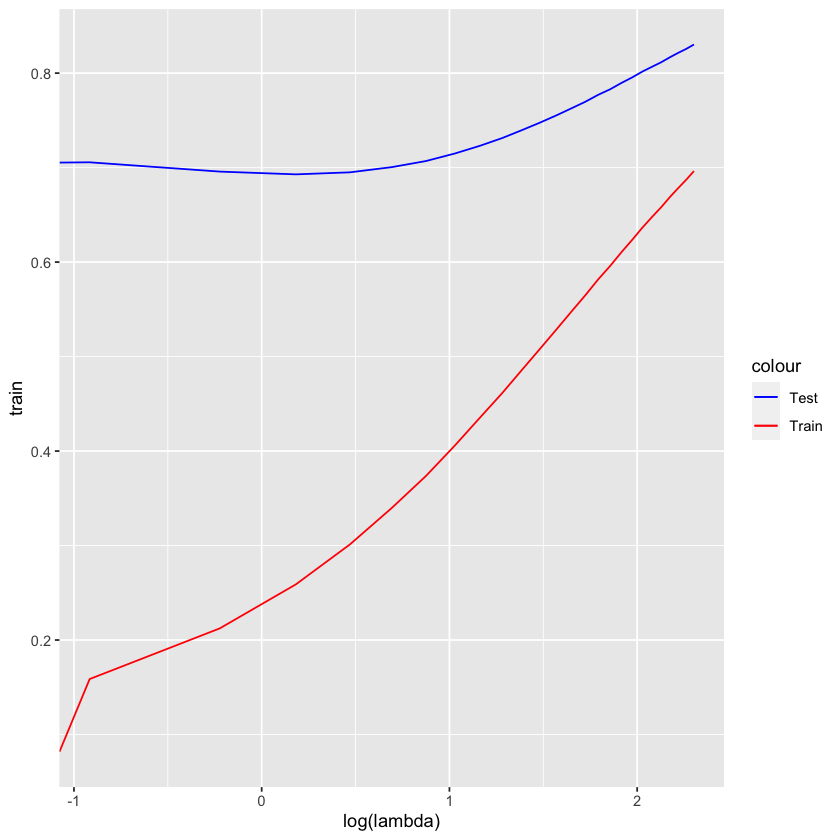

In [12]:
suppressWarnings({
# playing with the SGD part
play_with_sgd()

})

### Question 5 (III c)

- best value of lambda will be somewhere in the middle region where where test error is less. From the plot above, value of log(𝜆) in this region is between -0.5 to 0.5. The best value of 𝜆 can be 0.8 or 1.2.
- Initially, when 𝜆 is very small, model is too complex,with test error high and low train error. Model is over fitted.
- As 𝜆 is increasing, model becomes simpler, increasing the training error.
- With increase in 𝜆, testing error is decreasing due to less complexity of model. 
- Also, after some time, test error starts increasing with 𝜆 which means the model is becoming too simple and underfitted. This means that 𝜆 is becoming too large.
